In [68]:
%matplotlib notebook

In [69]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats

In [70]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")

C:\Users\freguenet3\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
housing_df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [72]:
housing_df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [73]:
housing_df.dtypes.head

<bound method NDFrame.head of Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA

In [74]:
housing_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [75]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month
hdf3 = housing_df2.loc[housing_df2['SOURCE'] == 'Residential', : ]
hdf4 = hdf3.dropna(subset=['PRICE'])
hdf5 = hdf4.loc[hdf4['YEAR']> 1991, : ]
hdf6 = hdf5.loc[hdf5['YEAR']< 2018, : ]
hdf6.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,YEAR,MONTH
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2003.0,11.0
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2016.0,6.0
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2006.0,7.0
5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,1972,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2010.0,2.0
7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,1972,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,2011.0,9.0


<IPython.core.display.Javascript object>


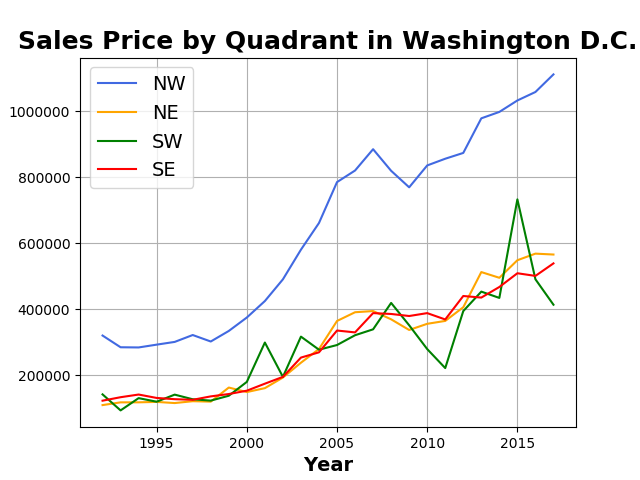

In [76]:
residential_df = pd.DataFrame(hdf6[["YEAR", "PRICE", "QUADRANT", "WARD", "BEDRM", "CNDTN"]])

residential_NW = residential_df.loc[residential_df["QUADRANT"] == "NW"]
ave_residential_NW = residential_NW.groupby("YEAR")["PRICE"].mean().round(0)
ave_residential_NW_df = pd.DataFrame(ave_residential_NW)
plt.plot(ave_residential_NW_df, label= "NW", color="royalblue")

residential_NE = residential_df.loc[residential_df["QUADRANT"] == "NE"]
ave_residential_NE = residential_NE.groupby("YEAR")["PRICE"].mean().round(0)
ave_residential_NE_df = pd.DataFrame(ave_residential_NE)
plt.plot(ave_residential_NE_df, label= "NE", color="orange")

residential_SW = residential_df.loc[residential_df["QUADRANT"] == "SW"]
ave_residential_SW = residential_SW.groupby("YEAR")["PRICE"].mean().round(0)
ave_residential_SW_df = pd.DataFrame(ave_residential_SW)
plt.plot(ave_residential_SW_df, label= "SW", color="green")

residential_SE = residential_df.loc[residential_df["QUADRANT"] == "SE"]
ave_residential_SE = residential_SE.groupby("YEAR")["PRICE"].mean().round(0)
ave_residential_SE_df = pd.DataFrame(ave_residential_SE)
plt.plot(ave_residential_SE_df, label= "SE", color= "red")

plt.title("Sales Price by Quadrant in Washington D.C.", fontsize=18, fontweight='bold')
plt.ylabel("Number of Residential Remodels", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.grid()
plt.legend(fontsize=14)
plt.savefig("Price_in_DC_quadrant.png")
plt.show()


In [10]:
# ave_residential_NW = residential_NW.groupby("YEAR")["PRICE"].mean().apply(lambda x: '${:,.2f}'.format(x))
# ave_residential_NW_df = pd.DataFrame(ave_residential_NW)

# for row, year in ave_residential_NW_df.iterrows():
#     NW_92 = ave_residential_NW_df.iloc[PRICE"]
# print (NW_92)




# # change_in_price_92_2017NW
# # ave_residential_NW_df = pd.DataFrame(ave_residential_NW)
# # ave_residential_NW_df
# # # .set_index("YEAR")
# # # # ave_residential_NW_df("YEARR")
# # NW = ave_residential_NW_92.iloc["1992.0",:]
# # ave_residential_NW_92 = a

In [77]:

residential_df_ttest = stats.ttest_ind(residential_df["YEAR"], residential_df["PRICE"], equal_var=False)
print (residential_df_ttest)
#Useless excercise

Ttest_indResult(statistic=-226.00922568082416, pvalue=0.0)


<IPython.core.display.Javascript object>


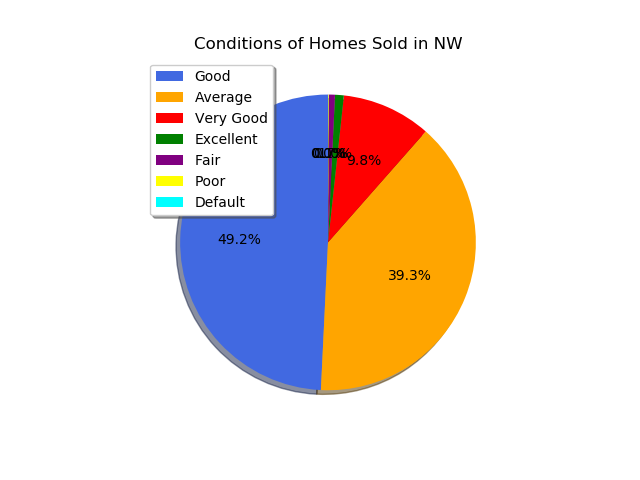

<IPython.core.display.Javascript object>


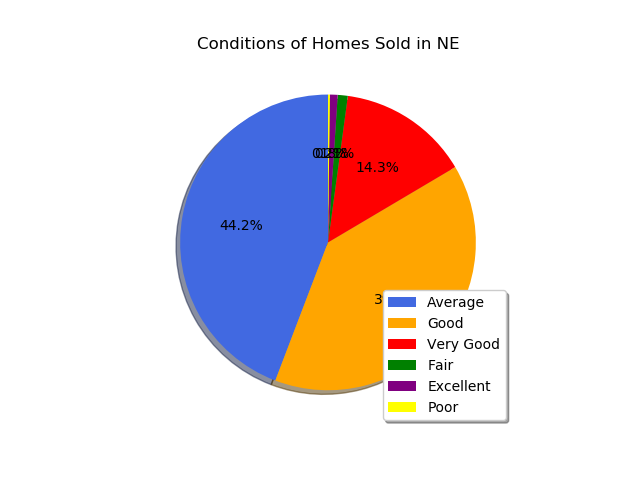

<IPython.core.display.Javascript object>


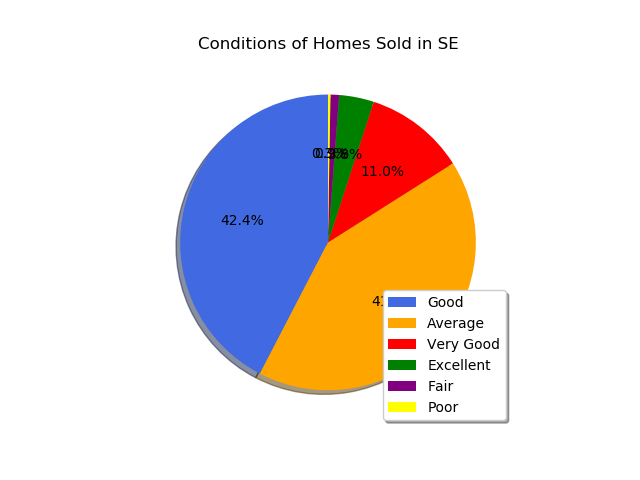

<IPython.core.display.Javascript object>


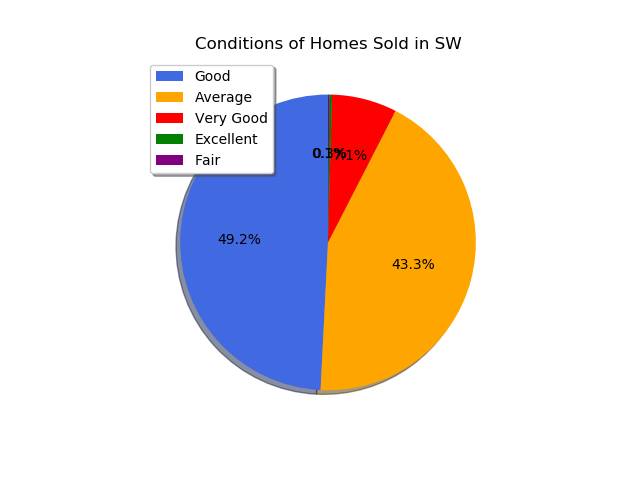

In [110]:
condition_NW = pd.DataFrame(residential_NW["CNDTN"].value_counts())
condition_NW.columns = ["Num_Sales"]
condition_NW
colors = ["royalblue", "orange", "red", "green", "purple", "yellow", "cyan", "magenta"]
condition_NW.plot.pie("Num_Sales", labels=None, title= "Conditions of Homes Sold in NW", colors=colors, shadow=True, startangle=90, autopct="%1.1f%%")
plt.ylabel("")
plt.xlabel("")
plt.legend(labels=condition_NW.index, loc="best", shadow=True)


condition_NE = pd.DataFrame(residential_NE["CNDTN"].value_counts())
condition_NE.columns = ["Num_Sales"]
condition_NE
colors = ["royalblue", "orange", "red", "green", "purple", "yellow", "cyan", "magenta"]
condition_NE.plot.pie("Num_Sales", labels=None, title= "Conditions of Homes Sold in NE", colors=colors, shadow=True, startangle=90, autopct="%1.1f%%")
plt.ylabel("")
plt.xlabel("")
plt.legend(labels=condition_NE.index, loc="best", shadow=True)


condition_SE = pd.DataFrame(residential_SE["CNDTN"].value_counts())
condition_SE.columns = ["Num_Sales"]
condition_SE
colors = ["royalblue", "orange", "red", "green", "purple", "yellow", "cyan", "magenta"]
condition_SE.plot.pie("Num_Sales", labels=None, title= "Conditions of Homes Sold in SE", colors=colors, shadow=True, startangle=90, autopct="%1.1f%%")
plt.ylabel("")
plt.xlabel("")
plt.legend(labels=condition_NW.index, loc="best", shadow=True)


condition_SW = pd.DataFrame(residential_SW["CNDTN"].value_counts())
condition_SW.columns = ["Num_Sales"]
condition_SW
colors = ["royalblue", "orange", "red", "green", "purple", "yellow", "cyan", "magenta"]
condition_SW.plot.pie("Num_Sales", labels=None, title= "Conditions of Homes Sold in SW", colors=colors, shadow=True, startangle=90, autopct="%1.1f%%")
plt.ylabel("")
plt.xlabel("")
plt.legend(labels=condition_NW.index, loc="best", shadow=True)


plt.savefig("Conditions_in_DC_quadrant.png")
plt.show()
